In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from network import Network
import torch


In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

# Make higgs and qcd sets from raw data
hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
# hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]
# qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)', 'deltaPhi(h1, h2)', 'deltaPhi(h1 jets)', 'deltaPhi(h2 jets)']]
# hh_all = hh_raw[['hh_mass', 'h1_mass', 'h2_mass']]
# qcd = qcd_raw[['hh_mass', 'h1_mass', 'h2_mass']]
# hh_all = hh_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['deltaR(h1 jets)', 'deltaR(h2 jets)']]
n_factors = np.shape(hh_all)[1]
print(n_factors)

# change this for testing w dummy variables
# n_factors = 2
# n_factors +=1
# print(n_factors)

1703 rows of qcd data
4605 rows of dihiggs data
5


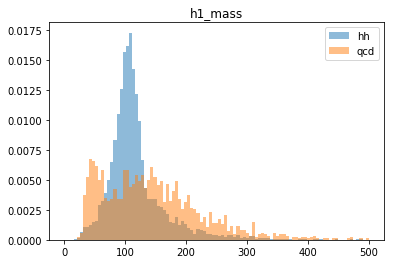

In [3]:
plt.hist(hh_raw['h1_mass'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.hist(qcd_raw['h1_mass'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.title("h1_mass")
plt.legend()
plt.show()

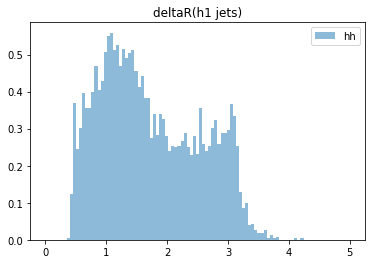

In [4]:
plt.hist(hh_raw['deltaR(h1 jets)'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 5, 100))
# plt.hist(qcd_raw['deltaR(h1 jets)'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 5, 100))
plt.title("deltaR(h1 jets)")
plt.legend()
plt.show()

In [5]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

# add labels to di-higgs
hh_all=hh_all[:,:n_factors]
# # print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
# hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
hh_all = np.append(hh_all, hh_labels, axis=1)
# hh_all = np.append(hh_all, 1-hh_labels, axis=1)## hh qcd labels 


# print(hh.shape)
# print(hh[0:3])

# add labels to qcd
qcd=qcd[:,:n_factors]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
# qcd hh labels 
# qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
qcd = np.append(qcd, qcd_labels, axis=1) 
# qcd = np.append(qcd, 1-qcd_labels, axis=1)# qcd qcd labels


# use this for dummy variables
# hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
# hh_all[:,1] = np.random.rand(np.shape(hh_all)[0])
# qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
# qcd[:, 1] = -1 * np.random.rand(np.shape(qcd)[0])

# 

# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]
# print(hh[:4])
# print(qcd[:4])

all_data = np.append(hh,qcd, axis=0) 
all_data[:n_factors,:]

np.random.seed(0)
for i in range (4): # shuffle 4 times
    np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,n_factors:]
# for testing model resilience
# for i in range(2):
#     np.random.shuffle(all_labels)
all_data = all_data[:,:n_factors]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

[[3.59871965e+02 9.95274650e+01 1.23727135e+02 1.83328407e+00
  2.89078642e+00 1.00000000e+00]
 [3.77248615e+02 1.84710247e+02 7.76233425e+01 2.84355966e+00
  1.90858838e+00 0.00000000e+00]
 [9.83485927e+01 3.04781249e+01 1.78390904e+01 6.92389046e-01
  5.39485992e-01 1.00000000e+00]
 [5.42543199e+02 1.17018061e+02 9.01747176e+01 2.65217628e+00
  2.29208081e+00 1.00000000e+00]]
[[1.]
 [0.]
 [1.]
 [1.]]


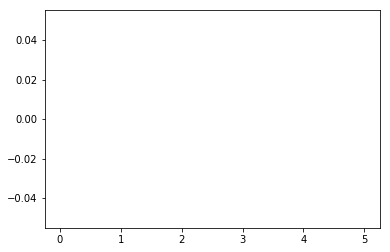

[[0.16406217 0.13777842 0.206275   0.33357623 0.57712665]
 [0.17198402 0.25569913 0.12941183 0.51740149 0.38103722]
 [0.04483618 0.04219165 0.02974092 0.12598404 0.10770486]
 [0.24734024 0.1619911  0.15033719 0.48257822 0.45759898]]


In [6]:
plt.hist(all_data[:,0], alpha=.25, bins=np.linspace(0, 5, 100))
plt.show()

# scale the data by dividing it by the max value of each
for i in range(np.shape(all_data)[1]):
    all_data[:,i] = np.true_divide(all_data[:,i], np.max(all_data[:,i]))
print(all_data[:4])

# plt.hist(all_data[:,0], alpha=.25, bins=np.linspace(0, 5, 100))
# plt.show()

In [7]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.3, test_size=0.5, random_state=42)
# print(len(train_data))
# print(train_data)
# print(train_data.shape)
# print(train_labels)
train_data = torch.from_numpy(train_data)
# train_data = torch.zeros(len(train_labels), 4)
test_data = torch.from_numpy(test_data)
# test_data = torch.zeros(len(test_labels), 4)
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)




torch.Size([1021, 5])
torch.Size([1703, 5])
torch.Size([1021, 1])
torch.Size([1703, 1])


In [8]:
learnRate = 0.01
np.random.seed(234)
node_list = [n_factors, 10, 10, 1]
old_model = Network(node_list)
model = Network(node_list, old_model.w_initial, old_model.b_initial)
model.train(train_data, train_labels, 2401, learnRate, 0, True, test_data, test_labels)

train accuracy at epoch 0 is: 49.75514201762977
test accuracy is: 49.67704051673517
train accuracy at epoch 300 is: 58.57002938295788
test accuracy is: 56.429829712272465
train accuracy at epoch 600 is: 60.430950048971596
test accuracy is: 59.42454492072813
train accuracy at epoch 900 is: 61.99804113614103
test accuracy is: 61.06870229007634
train accuracy at epoch 1200 is: 62.19392752203722
test accuracy is: 61.597181444509694
train accuracy at epoch 1500 is: 62.977473065621936
test accuracy is: 62.008220786846735
train accuracy at epoch 1800 is: 63.3692458374143
test accuracy is: 62.360540223135644
train accuracy at epoch 2100 is: 63.85896180215476
test accuracy is: 62.7715795654727
train accuracy at epoch 2400 is: 63.956904995102846
test accuracy is: 63.065179095713454


In [9]:
# testout = model.get_output().numpy()
# testout[testout>.5] = 1
# testout[test out<=.5] = 0
# print("train", np.sum(train_labels.numpy()))
# print("test", np.sum(test_labels.numpy()))
# print("out", np.sum(testout))
# print("train acc", (1-(np.sum(np.abs(train_labels.numpy()-testout))/len(train_labels.numpy())))
#      )
# print("test acc", (1-(np.sum(np.abs(test_labels.numpy()-testout))/len(test_labels.numpy())))
#      )


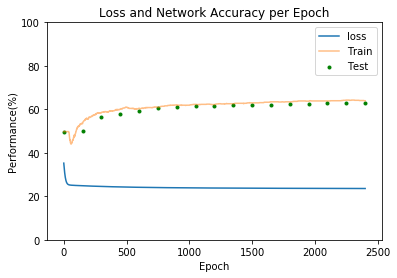

In [10]:
# print(model.losses)
plt.plot(model.losses, label="loss")
plt.plot(model.train_accuracies, label="Train", alpha=0.5)
plt.scatter(model.test_num, model.test_accuracies, label="Test", marker=".", color="green")
plt.xlabel("Epoch")
plt.ylabel("Performance(%)")
plt.title("Loss and Network Accuracy per Epoch")
plt.legend()
plt.ylim(0,100)
plt.show()

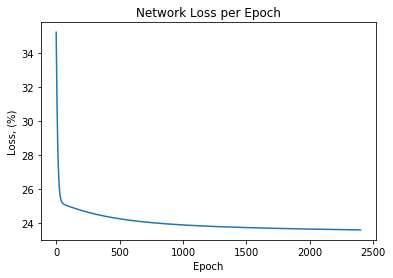

In [11]:
plt.plot(model.losses)
plt.title("Network Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss, (%)")
plt.show()

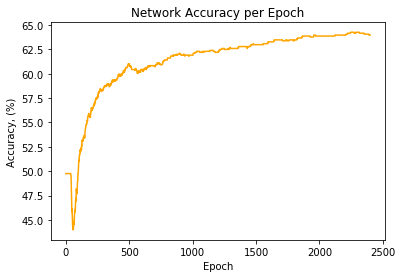

In [12]:
plt.plot(model.train_accuracies, label="Train", color="orange")
plt.title("Network Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy, (%)")
plt.show()

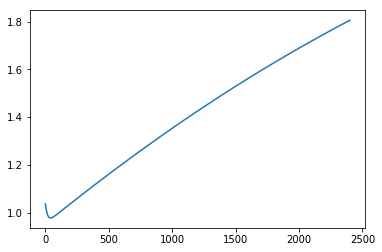

In [13]:
plt.plot(model.weight_change)

In [14]:
# print(len(model.weights))
# print(model.weights)

In [15]:
# print(model.biases)

In [16]:
print(model.layers)

[tensor([[0.7647, 0.5130, 0.7458,  ..., 0.6391, 0.5317, 0.7117],
        [0.7820, 0.3969, 0.7948,  ..., 0.6403, 0.4610, 0.7009],
        [0.8950, 0.4480, 0.6141,  ..., 0.5994, 0.2271, 0.9177],
        ...,
        [0.8388, 0.6074, 0.6655,  ..., 0.5899, 0.4108, 0.8279],
        [0.8657, 0.5083, 0.6175,  ..., 0.6048, 0.3034, 0.8884],
        [0.8147, 0.4478, 0.7115,  ..., 0.6400, 0.4042, 0.8064]]), tensor([[0.5943, 0.2521, 0.0078,  ..., 0.3311, 0.7439, 0.0915],
        [0.6279, 0.3164, 0.0106,  ..., 0.3974, 0.7739, 0.1151],
        [0.3813, 0.4254, 0.0172,  ..., 0.5429, 0.7991, 0.2310],
        ...,
        [0.4324, 0.2948, 0.0082,  ..., 0.3875, 0.7492, 0.1263],
        [0.4023, 0.3655, 0.0123,  ..., 0.4719, 0.7808, 0.1836],
        [0.5289, 0.3246, 0.0114,  ..., 0.4243, 0.7797, 0.1371]]), tensor([[0.6547],
        [0.5982],
        [0.3632],
        ...,
        [0.5621],
        [0.4409],
        [0.5418]])]


In [17]:
# out_labels = model.get_output()
# a = out_labels[:,0]
# # b = out_labels[:,1]
# c = (a+b)
# print(c)
# print(0.7336+0.1798)
# print(c.shape)

In [18]:
print(model.weights)

[tensor([[ 1.8062, -0.7559,  0.7805, -0.0787,  0.2161,  0.1429,  0.4100, -2.3264,
         -1.9363, -0.3201],
        [ 1.1229,  1.7769, -0.3184, -0.7268,  1.1953, -1.2831, -1.5704,  0.9869,
         -2.0485,  2.4684],
        [ 0.3849, -0.5731,  0.1697, -0.4220, -0.4573, -1.1549, -0.8812,  0.2349,
         -0.0354,  0.4265],
        [ 1.3898,  0.3042, -1.8395, -2.0391, -0.3777,  0.6058, -0.1311, -0.8551,
         -1.3887,  2.2985],
        [-0.3452, -2.1992,  1.1963, -0.7643,  0.8362, -0.5378, -1.4820,  0.3751,
         -0.4517, -0.8245]]), tensor([[-1.4139,  1.1113, -1.3883,  0.8712, -0.3093,  0.1656, -0.2613,  2.1636,
          0.0741,  0.9961],
        [-0.9058, -0.7732,  0.2551,  0.0991,  0.2404, -0.8667,  1.0307, -1.2959,
         -2.0945,  0.3672],
        [ 1.2915,  0.4239, -0.0770, -1.4580,  0.1511,  1.5774, -2.4333, -0.3143,
         -0.5327, -0.5128],
        [-0.4201, -0.2467, -1.1364, -1.2954,  0.8838,  0.8506, -1.1026, -0.0237,
          1.0099, -0.6807],
        [ 1.6941

In [19]:
print(1-sum(train_labels)/len(train_labels))

tensor([0.4976], dtype=torch.float64)


In [20]:
print(train_data)

tensor([[0.1396, 0.0528, 0.1558, 0.0953, 0.2971],
        [0.1912, 0.0902, 0.2237, 0.1024, 0.5069],
        [0.1706, 0.2577, 0.3008, 0.6195, 0.6054],
        ...,
        [0.1982, 0.1504, 0.1658, 0.2521, 0.2001],
        [0.1399, 0.1969, 0.1645, 0.5134, 0.4777],
        [0.1281, 0.1267, 0.1964, 0.3066, 0.4984]], dtype=torch.float64)


In [21]:
print(model.biases)

[tensor([[0.7775, 0.7775, 0.7775, 0.7775, 0.7775, 0.7775, 0.7775, 0.7775, 0.7775,
         0.7775]]), tensor([[-0.4026, -0.4026, -0.4026, -0.4026, -0.4026, -0.4026, -0.4026, -0.4026,
         -0.4026, -0.4026]]), tensor([[0.2011]])]


In [22]:

pred = model.pred(test_data)[-1].numpy()
actual = test_labels.numpy()
print(pred)
pred[pred>.5] = 1
pred[pred<.51] = 0
print(pred)

print(sum(train_labels)/len(train_labels))
print(sum(test_labels)/len(train_labels))

print("ASDF", sum(pred)/len(pred))

[[0.5427411 ]
 [0.55294406]
 [0.342267  ]
 ...
 [0.60596454]
 [0.5360598 ]
 [0.64598376]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
tensor([0.5024], dtype=torch.float64)
tensor([0.8394], dtype=torch.float64)
ASDF [0.52025837]
